In [84]:
import seaborn as sns
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv("../datas/Advertising.csv").drop("Unnamed: 0", axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


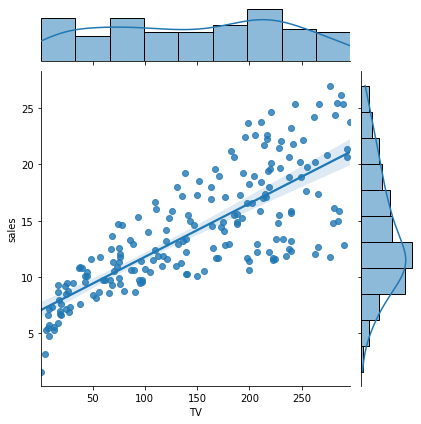

In [63]:
sns.jointplot(x = "TV", y = "sales", data=df, kind="reg");

# Model Way 1

In [64]:
import statsmodels.api as sm

In [65]:
X = sm.add_constant(df[["TV"]])
y = df["sales"]
linearModel = sm.OLS(y,X)
model = linearModel.fit()

In [66]:
# Modelin anlamliligi
model.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Sun, 16 Jan 2022",Prob (F-statistic):,1.47e-42
Time:,19:39:07,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [67]:
# Katsayilar
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


# Model Way 2

In [68]:
import statsmodels.formula.api as smf

In [69]:
linearModel =  smf.ols("sales ~ TV", df)
model = linearModel.fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [70]:
print(model.params)
print(f"{model.f_pvalue:f}")

const    7.032594
TV       0.047537
dtype: float64
0.000000


# Model Way 3

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
X =  df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model =  reg.fit(X, y)
print(model.coef_,model.intercept_)

[0.04753664] 7.032593549127694


In [73]:
model.score(X,y)

0.611875050850071

In [74]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

# Predict

In [75]:
X =  df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model =  reg.fit(X, y)

In [76]:
model.predict([[30]])

array([8.45869276])

In [77]:
yeni_veri = [[3],[4],[5]]
model.predict(yeni_veri)

array([7.17520347, 7.22274011, 7.27027675])

# Errors

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
linearModel =  smf.ols("sales ~ TV", df)
model = linearModel.fit()

In [85]:
mse = mean_squared_error(y, model.fittedvalues)
print(mse, np.sqrt(mse))

10.512652915656753 3.2423221486546883


In [98]:
compare_table = pd.DataFrame({"Y":y, "Predict Y":model.predict(X)})
compare_table["error"] = abs(compare_table["Y"] - compare_table["Predict Y"])
compare_table["error^2"] = compare_table["error"]**2
np.sqrt(np.mean(compare_table["error^2"]))

3.242322148654688

In [100]:
compare_table.head(3)

,Y,Predict Y,error,error^2
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851


In [101]:
import matplotlib as plt

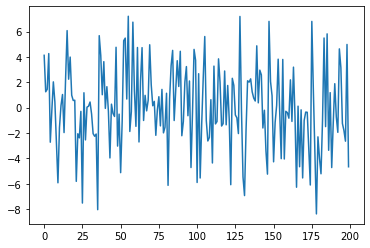

In [107]:
sns.lineplot( y= model.resid, x=model.resid.index);